In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [2]:
train = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
test = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')
print(train.shape, test.shape)

(1460, 81) (1459, 80)


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


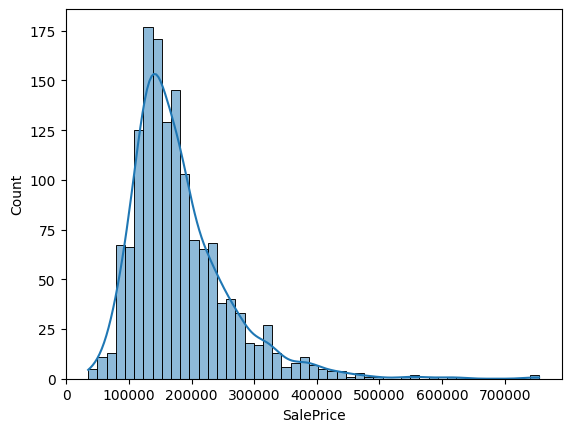

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(train["SalePrice"], kde=True)
plt.show()


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


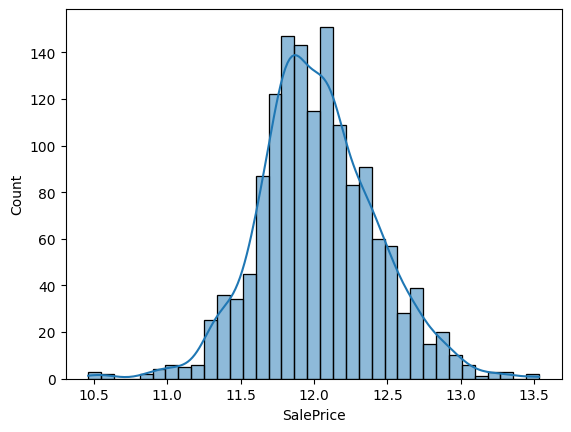

In [4]:
import numpy as np

y = np.log1p(train["SalePrice"])  

sns.histplot(y, kde=True)
plt.show()


In [5]:
train["Electrical"]

0       SBrkr
1       SBrkr
2       SBrkr
3       SBrkr
4       SBrkr
        ...  
1455    SBrkr
1456    SBrkr
1457    SBrkr
1458    FuseA
1459    SBrkr
Name: Electrical, Length: 1460, dtype: object

In [6]:
missing = train.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
missing.head(20)


PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
Electrical         1
dtype: int64

In [7]:
train.drop(columns=['PoolQC', "MiscFeature", "Alley"])
train["MasVnrArea"] = train["MasVnrArea"].fillna(0)
train["Electrical"] = train["Electrical"].fillna(train["Electrical"].mode()[0])

for col in ["GarageType","GarageFinish","GarageQual","GarageCond",
            "BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2","MasVnrType"]:
    train[col] = train[col].fillna("None")


In [8]:
cols = train.columns

asd=[]
for col in cols:
    if train[col].isnull().sum() > 0:
        print(col, train[col].isnull().sum() )
        asd.append(col)

print(asd)

LotFrontage 259
Alley 1369
FireplaceQu 690
GarageYrBlt 81
PoolQC 1453
Fence 1179
MiscFeature 1406
['LotFrontage', 'Alley', 'FireplaceQu', 'GarageYrBlt', 'PoolQC', 'Fence', 'MiscFeature']


In [9]:
demo_train = train
demo_train = demo_train.drop(columns=['LotFrontage', 'Alley', 'FireplaceQu', 'GarageYrBlt', 'PoolQC', 'Fence', 'MiscFeature'])


In [10]:
X = demo_train.select_dtypes(include=['int32', 'int64'])
X = X.drop(columns=['SalePrice'])
Y = demo_train['SalePrice']

cols = demo_train.columns

asd=[]
for col in cols:
    if demo_train[col].isnull().sum() > 0:
        print(col, train[col].isnull().sum() )
        asd.append(col)

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size=0.2, random_state=42)


lr = LinearRegression()
lr.fit(X, Y)


y_pred = lr.predict(X_val)


rmse = mean_squared_error(y_val, y_pred, squared=False)
print("Validation RMSE:", rmse)

Validation RMSE: 35938.578965919565


In [12]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, Y)

xgb = XGBRegressor(n_estimators=1000, learning_rate=0.05, random_state=42)
xgb.fit(X, Y)

y_val_pred = xgb.predict(X_val)
rmse = mean_squared_error(y_val, y_val_pred, squared=False)
print("Validation RMSE:", rmse)



Validation RMSE: 647.4076986222633
